## This notebook covers both the **Data scientist** and **EDA** part for the project.

You can read about the dataset used here on the given links below:

---
- [CDC website](https://archive.ics.uci.edu/dataset/891/cdc%2Bdiabetes%2Bhealth%2Bindicators?) What this dataset contains?
- [Kaggle](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?) Why this project is important?
---

###  Importing dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

Fetching the dataset from `ucimlrepo`

In [2]:
data = fetch_ucirepo(id=891)
# data.to_csv('diabetes_dataset.csv', index=False)

The code below is to set the view of the columns and the rows to the max.

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# Extract the 'original' dataset from the dotdict object and create a DataFrame
df = pd.DataFrame(data['data']['original'])
# df.head()
df.to_csv('diabetes_dataset.csv', index=False)

Dropped the ID col as it's irrelevant to the model training.

In [5]:
df.drop(columns="ID", inplace=True, axis=1)

In [6]:
df.shape

(253680, 22)

In [7]:
import pandas as pd
df = pd.read_csv('diabetes_dataset.csv')
df.columns

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

In [8]:
# Feature: Has_High_Risk_Factor
df["Has_High_Risk_Factor"] = (
    (df["HighBP"] == 1) | (df["HighChol"] == 1) | (df["CholCheck"] == 0)
).astype(int)

# Feature: Cardio_History
df["Cardio_History"] = (
    (df["Stroke"] == 1) | (df["HeartDiseaseorAttack"] == 1)
).astype(int)

# Feature: Risky_Habits
df["Risky_Habits"] = df["Smoker"] + df["HvyAlcoholConsump"]

# Feature: Healthy_Lifestyle_Score
df["Healthy_Lifestyle_Score"] = df["PhysActivity"] + df["Fruits"] + df["Veggies"]

# Feature: Total_Unhealthy_Days
df["Total_Unhealthy_Days"] = df["MentHlth"] + df["PhysHlth"]

# Optional Binning: BMI Category
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df["BMI_Category"] = df["BMI"].apply(bmi_category)

# Optional Binning: General Health
df["GenHlth_Binary"] = df["GenHlth"].apply(lambda x: 1 if x <= 3 else 0)  # 1 = Good, 0 = Poor

# Optional Binning: Age Group
def age_group(age_code):
    if age_code <= 3:
        return "18-29"
    elif age_code <= 5:
        return "30-44"
    elif age_code <= 7:
        return "45-59"
    else:
        return "60+"

df["Age_Group"] = df["Age"].apply(age_group)

# Optional: One-hot encode categorical (like Age_Group, BMI_Category) later before training


In [9]:
df.head()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Has_High_Risk_Factor,Cardio_History,Risky_Habits,Healthy_Lifestyle_Score,Total_Unhealthy_Days,BMI_Category,GenHlth_Binary,Age_Group
0,0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3,1,0,1,1,33,Obese,0,60+
1,1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1,1,0,1,1,0,Overweight,1,45-59
2,2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8,1,0,0,1,60,Overweight,0,60+
3,3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6,1,0,0,3,0,Overweight,1,60+
4,4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4,1,0,0,3,3,Normal,1,60+


In [10]:
df.columns

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Has_High_Risk_Factor', 'Cardio_History',
       'Risky_Habits', 'Healthy_Lifestyle_Score', 'Total_Unhealthy_Days',
       'BMI_Category', 'GenHlth_Binary', 'Age_Group'],
      dtype='object')

In [18]:
df.to_csv('diabetes_dataset_enhanced.csv', index=False)

In [11]:
df["Diabetes_binary"].value_counts()

Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64

The data set has no null value or missing value

In [12]:
df.isnull().sum()

ID                         0
Diabetes_binary            0
HighBP                     0
HighChol                   0
CholCheck                  0
BMI                        0
Smoker                     0
Stroke                     0
HeartDiseaseorAttack       0
PhysActivity               0
Fruits                     0
Veggies                    0
HvyAlcoholConsump          0
AnyHealthcare              0
NoDocbcCost                0
GenHlth                    0
MentHlth                   0
PhysHlth                   0
DiffWalk                   0
Sex                        0
Age                        0
Education                  0
Income                     0
Has_High_Risk_Factor       0
Cardio_History             0
Risky_Habits               0
Healthy_Lifestyle_Score    0
Total_Unhealthy_Days       0
BMI_Category               0
GenHlth_Binary             0
Age_Group                  0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       253680 non-null  int64 
 1   Diabetes_binary          253680 non-null  int64 
 2   HighBP                   253680 non-null  int64 
 3   HighChol                 253680 non-null  int64 
 4   CholCheck                253680 non-null  int64 
 5   BMI                      253680 non-null  int64 
 6   Smoker                   253680 non-null  int64 
 7   Stroke                   253680 non-null  int64 
 8   HeartDiseaseorAttack     253680 non-null  int64 
 9   PhysActivity             253680 non-null  int64 
 10  Fruits                   253680 non-null  int64 
 11  Veggies                  253680 non-null  int64 
 12  HvyAlcoholConsump        253680 non-null  int64 
 13  AnyHealthcare            253680 non-null  int64 
 14  NoDocbcCost         

---

Selected **"BMI", "MentHlth", "PhysHlth"** cols because only these 3 cols have continous numerical data.

### Explaination

There are in total 6 features which can be considered for the std vs mean comparison but only three of these are truly continous numeric other three are ordinal, that's why these cols have been chosen for further EDA.

In [14]:
df[["BMI", "MentHlth", "PhysHlth"]].describe().round(2)

,BMI,MentHlth,PhysHlth
count,253680.00,253680.00,253680.00
mean,28.38,3.18,4.24
std,6.61,7.41,8.72
min,12.00,0.00,0.00
25%,24.00,0.00,0.00
50%,27.00,0.00,0.00
75%,31.00,2.00,3.00
max,98.00,30.00,30.00


Out of 3 features only **BMI** standout as the feature with normal distribution, but other two **MentHlth** and **PhysHlth** contains outlier and need to verify them using the visualisation methods.

---

Here, using the `Histograms` to see the distribution of the data within each feature.

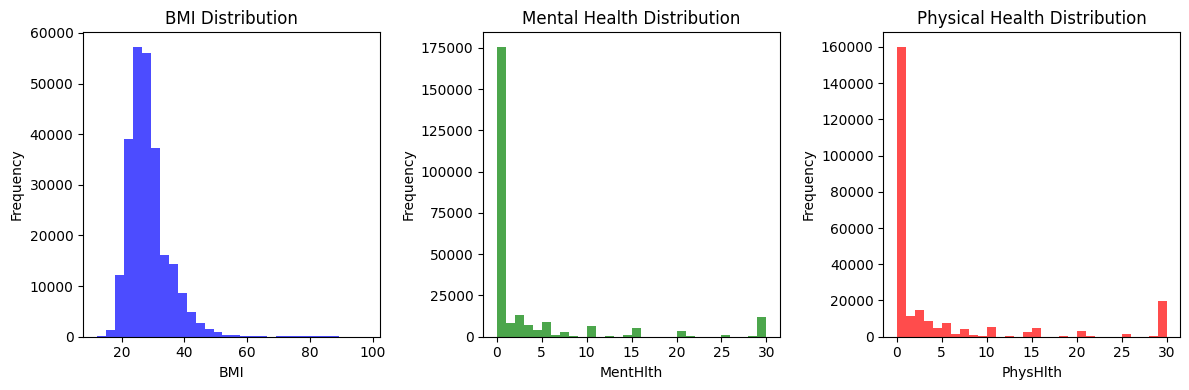

In [15]:
bmi = df["BMI"].values
menthlth = df["MentHlth"].values
physhlth = df["PhysHlth"].values
plt.figure(figsize=(12, 4))

# Plot histogram for BMI
plt.subplot(1, 3, 1)
plt.hist(bmi, bins=30, color='blue', alpha=0.7)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Plot histogram for MentHlth
plt.subplot(1, 3, 2)
plt.hist(menthlth, bins=30, color='green', alpha=0.7)
plt.title('Mental Health Distribution')
plt.xlabel('MentHlth')
plt.ylabel('Frequency')

# Plot histogram for PhysHlth
plt.subplot(1, 3, 3)
plt.hist(physhlth, bins=30, color='red', alpha=0.7)
plt.title('Physical Health Distribution')
plt.xlabel('PhysHlth')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Reference to the previous section confirms that the features **MentHlth** and **PhysHlth** contain outliers, which is further verified using the histogram.

**MentHlth** shows a few outliers, which is expected in real-world medical data.

**PhysHlth** also presents minor outliers, considered normal in this context.

For V1 of the project, Linear Regression will be used as a simple baseline model to help understand the problem structure and model behavior.

---

This section covers boxplot visualizations for overall EDA and outlier detection. All three selected features are included.

C:\Users\singh\AppData\Local\Temp\ipykernel_19404\2001288949.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([menthlth, physhlth, bmi], vert=False, patch_artist=True,


{'whiskers': [<matplotlib.lines.Line2D at 0x1b5d16a3380>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5ef3efc80>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1b5ef3ef650>,
 'medians': [<matplotlib.lines.Line2D at 0x1b5ef438290>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b5ef3c2c00>,
 'means': []}

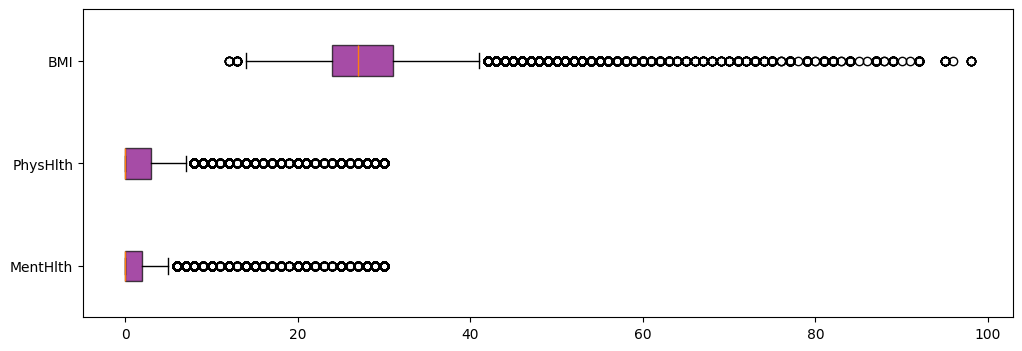

In [16]:
bmi = df["BMI"].values
menthlth = df["MentHlth"].values
physhlth = df["PhysHlth"].values
plt.figure(figsize=(12, 4))


# Combine MentHlth and PhysHlth into a single chart
plt.boxplot([menthlth, physhlth, bmi], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='purple', alpha=0.7), labels=['MentHlth', 'PhysHlth', 'BMI'])


Visualisation shows that each of these features consists outlier

---

For the current version, everything looks fine and there's no more need of dropping columns or other data preprocessing.

Used Histogram this to check for the feture vs target, This is called Bivariate Analysis.

<Axes: xlabel='Diabetes_binary', ylabel='BMI'>

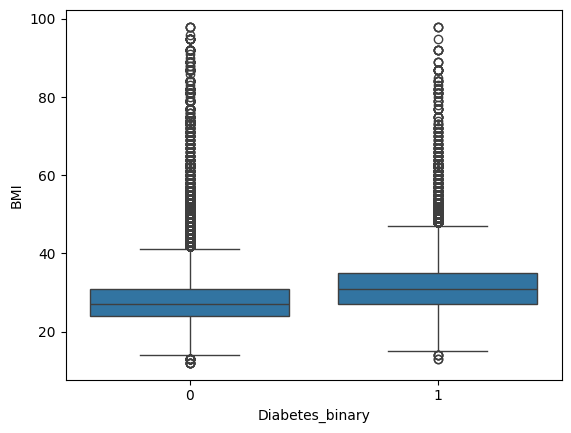

In [17]:
sns.boxplot(x="Diabetes_binary", y="BMI", data=df)

## **EDA SUMMARY**

###  `Target Variable`
-  Is imbalanced - 84% non-diabetic and 16% diabetic
- Indicates that need careful evaluation matrics later

###  `Continous Features Analyzed` ("BMI", "MentHlth", "PhysHlth")
- Outliers detected but retained, as they show real world variablity
- **BMI** is normally distributed, while other two are right-skewed

### `Correlation Insights`
- Most features show low correlation with target
- Some mild positive/negative correlations among features, but no strong rebundancy

### `Categorical &  Ordinal Features`

- All features are already in numeric form
- No missing values detected
- Ordinal features (like GenHlth, Education) reflect meaningful progression